<a href="https://colab.research.google.com/github/onkyponky/dl2/blob/main/deepl_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG19, MobileNet
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and normalize the CIFAR-10 dataset
def load_and_preprocess_cifar10():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0
    y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)
    return (x_train, y_train), (x_test, y_test)

# Preprocessed CIFAR-10 data
(x_train, y_train), (x_test, y_test) = load_and_preprocess_cifar10()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import Sequential

def build_model(base_model):
    # Freeze the base model
    base_model.trainable = False

    # Define the model architecture
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])

    return model


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG19, MobileNet

# Initialize the base models with pre-trained weights
def initialize_base_model(model_class, input_shape):
    return model_class(weights='imagenet', include_top=False, input_shape=input_shape)

# Compile the models
def compile_model(model):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Set device and define input shape
device_name = '/device:GPU:0'  # Change as necessary
input_shape = (32, 32, 3)

with tf.device("/device:GPU:0"):
    # Initialize base models
    resnet50_base = initialize_base_model(ResNet50, input_shape)
    vgg19_base = initialize_base_model(VGG19, input_shape)
    mobilenet_base = initialize_base_model(MobileNet, input_shape)

    # Build models with custom classification heads
    resnet_model = build_model(resnet50_base)
    vgg_model = build_model(vgg19_base)
    mobilenet_model = build_model(mobilenet_base)

    # Compile models
    models = [resnet_model, vgg_model, mobilenet_model]
    models = [compile_model(model) for model in models]


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


<ipython-input-4-1f42a32d3e98>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  return model_class(weights='imagenet', include_top=False, input_shape=input_shape)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Set training parameters
epochs = 10
batch_size = 64

# Define a list of models and a dictionary to store training history
models = {
    'ResNet50': resnet_model,
    'VGG19': vgg_model,
    'MobileNet': mobilenet_model
}
histories = {}

# Train each model and store history
for model_name, model in models.items():
    print(f"Training {model_name}...")
    histories[model_name] = model.fit(
        x_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, y_test),
        verbose=1
    )


Training ResNet50...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 189s 223ms/step - accuracy: 0.0995 - loss: 3.4134 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 171s 192ms/step - accuracy: 0.0982 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 192ms/step - accuracy: 0.0973 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 192ms/step - accuracy: 0.1012 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 218s 213ms/step - accuracy: 0.1004 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 186s 192ms/step - accuracy: 0.0991 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 167s 213ms/step - accuracy: 0.1007 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 203s 214ms/step

In [16]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG19, MobileNet
from tensorflow.keras.layers import Input, Lambda
from tensorflow.keras.models import Model

# Initialize the base models with pre-trained weights, and resize input
def initialize_base_model(model_class, input_shape):
    # Define input layer with original shape
    inputs = Input(shape=input_shape)

    # Resize input using a Lambda layer
    resized_input = Lambda(lambda image: tf.image.resize(image, (224, 224)))(inputs)

    # Instantiate the base model with resized input
    base_model = model_class(weights='imagenet', include_top=False, input_tensor=resized_input)

    # Create a Model with the original input and the base model's output
    model = Model(inputs=inputs, outputs=base_model.output)
    return model

# Compile the models (unchanged)
def compile_model(model):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Set device and define input shape (unchanged)
device_name = '/device:GPU:0'  # Change as necessary
input_shape = (32, 32, 3)

with tf.device("/device:GPU:0"):
    # Initialize base models
    resnet50_base = initialize_base_model(ResNet50, input_shape)
    vgg19_base = initialize_base_model(VGG19, input_shape)
    mobilenet_base = initialize_base_model(MobileNet, input_shape)

    # Build models with custom classification heads
    resnet_model = build_model(resnet50_base)
    vgg_model = build_model(vgg19_base)
    mobilenet_model = build_model(mobilenet_base)

    # Compile models
    models = [resnet_model, vgg_model, mobilenet_model]
    models = [compile_model(model) for model in models]

<ipython-input-16-dfd5bc81e9e0>:15: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = model_class(weights='imagenet', include_top=False, input_tensor=resized_input)


In [11]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    return 0.001 if epoch < 10 else 0.0001

lr_scheduler = LearningRateScheduler(lr_schedule)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


<Axes: >

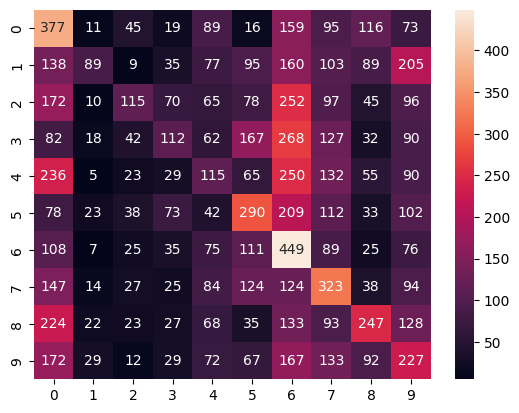

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')


In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

# Define the learning rate schedule
def lr_schedule(epoch):
    if epoch < 10:
        return 0.001  # Higher learning rate for initial epochs
    elif 10 <= epoch < 20:
        return 0.0005  # Lower learning rate for later epochs
    else:
        return 0.0001  # Minimal learning rate for fine-tuning

# Create the LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Compile the model with a chosen optimizer and loss function
model.compile(
    optimizer='adam',  # Experiment with other optimizers like SGD or RMSprop
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with the learning rate scheduler
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),  # Use augmented data
    validation_data=(x_test, y_test),
    epochs=30,
    callbacks=[lr_scheduler]
)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.applications import ResNet50, VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

num_classes = 10  # Adjust based on your dataset

# ResNet50 Model
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = resnet_base.output
x = GlobalAveragePooling2D()(x)  # Convert feature maps to a single vector per image
x = Dense(1024, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)
resnet_model = Model(inputs=resnet_base.input, outputs=output)

# VGG19 Model
vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = vgg_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)
vgg_model = Model(inputs=vgg_base.input, outputs=output)


In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile ResNet50 Model
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Compile VGG19 Model
vgg_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [ ]:
# Evaluate each model on the test set and store results in a dictionary
scores = {}
for model_name, model in models.items():
    scores[model_name] = model.evaluate(x_test, y_test, verbose=0)

# Print the results
for model_name, score in scores.items():
    print(f"{model_name} Test Loss: {score[0]:.4f}, Test Accuracy: {score[1]:.4f}")


ResNet50 Test Loss: 1.6604, Test Accuracy: 0.4072
VGG19 Test Loss: 1.1223, Test Accuracy: 0.6119
MobileNet Test Loss: 2.1192, Test Accuracy: 0.2344


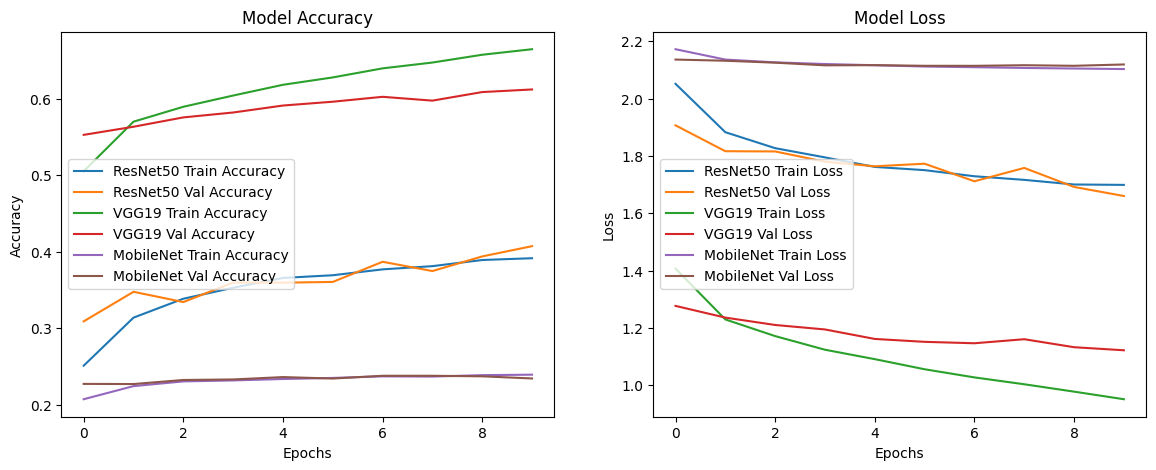

In [ ]:
import matplotlib.pyplot as plt

# Plot training history for accuracy and loss
def plot_history(histories):
    plt.figure(figsize=(14, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    for model_name, history in histories.items():
        plt.plot(history.history['accuracy'], label=f'{model_name} Train Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{model_name} Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    for model_name, history in histories.items():
        plt.plot(history.history['loss'], label=f'{model_name} Train Loss')
        plt.plot(history.history['val_loss'], label=f'{model_name} Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot histories
plot_history(histories)
